# Análise inicial dos dados

Importar os dados do Security Datasets

In [1]:
import requests
from zipfile import ZipFile
from io import BytesIO

url = 'https://raw.githubusercontent.com/OTRF/Security-Datasets/master/datasets/atomic/windows/credential_access/host/empire_mimikatz_logonpasswords.zip'
zipFileRequest = requests.get(url)
zipFile = ZipFile(BytesIO(zipFileRequest.content))
datasetJSONPath = zipFile.extract(zipFile.namelist()[0])

In [8]:
import pandas as pd
from pandas.io import json

df = json.read_json(path_or_buf=datasetJSONPath, lines=True)

print(df.head(10))

              tags                       TargetProcessGUID  @version  \
0  [mordorDataset]  {9f85ce58-5a6a-5f2b-a900-000000000400}         1   
1  [mordorDataset]  {9f85ce58-5a6a-5f2b-a900-000000000400}         1   
2  [mordorDataset]  {9f85ce58-5a6a-5f2b-a900-000000000400}         1   
3  [mordorDataset]                                     NaN         1   
4  [mordorDataset]                                     NaN         1   
5  [mordorDataset]                                     NaN         1   
6  [mordorDataset]                                     NaN         1   
7  [mordorDataset]                                     NaN         1   
8  [mordorDataset]                                     NaN         1   
9  [mordorDataset]                                     NaN         1   

       EventType  Version  ThreadID            EventTime   Task AccountType  \
0           INFO      3.0      4208  2020-08-07 10:32:22     10        User   
1           INFO      3.0      4208  2020-08-07 1

In [10]:
for col in df.columns:
    print(col)

tags
TargetProcessGUID
@version
EventType
Version
ThreadID
EventTime
Task
AccountType
SourceProcessGUID
CallTrace
Channel
SourceName
OpcodeValue
Hostname
@timestamp
Message
SourceModuleName
ProcessId
SourceImage
EventReceivedTime
port
AccountName
UtcTime
GrantedAccess
Domain
ExecutionProcessID
host
SourceProcessId
SourceThreadId
Severity
TargetProcessId
SeverityValue
EventID
UserID
ProviderGuid
RecordNumber
SourceModuleType
Keywords
TargetImage
RuleName
EventTypeOrignal
TargetObject
Image
ProcessGuid
SourcePort
Category
Opcode
Application
LayerRTID
LayerName
SourceAddress
FilterRTID
Protocol
DestAddress
Direction
RemoteMachineID
DestPort
RemoteUserID
DestinationPortName
DestinationIp
SourceIp
Initiated
DestinationHostname
SourceHostname
DestinationPort
SourceIsIpv6
User
DestinationIsIpv6
SourcePortName
ContextInfo
Payload
ActivityID
SubjectLogonId
PrivilegeList
SubjectDomainName
SubjectUserSid
SubjectUserName
TargetDomainName
ElevatedToken
TargetOutboundDomainName
IpPort
ImpersonationL

EventID
800     2940
4103    1695
10       272
5156     211
5158     195
12       154
3         90
4658      86
7         81
4656      49
13        45
4690      43
4663      43
11        14
4703      13
4689      11
5         11
4634      10
4624      10
4672      10
4627      10
600        8
4673       6
18         5
9          3
17         2
5145       2
400        1
1          1
4688       1
5857       1
5140       1
4670       1
22         1
Name: count, dtype: int64


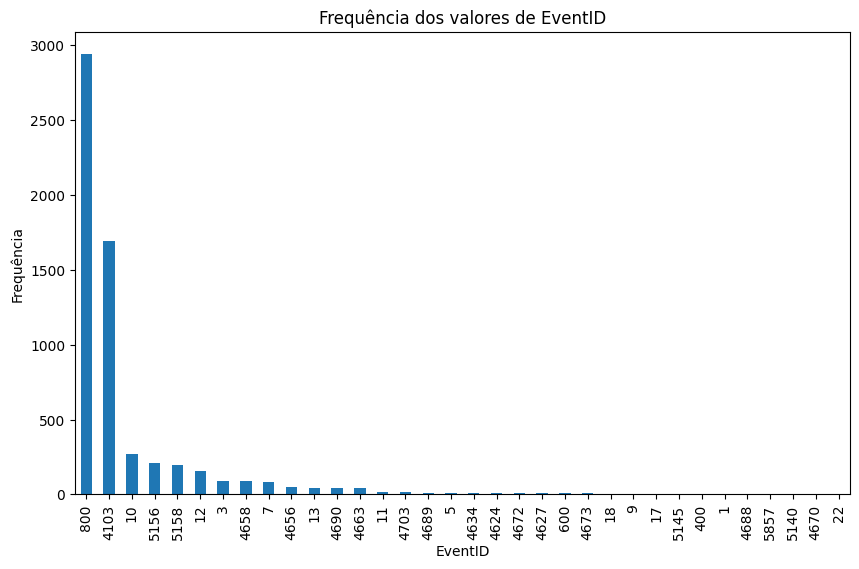

In [11]:
import matplotlib.pyplot as plt

# Supondo que você já tenha um DataFrame chamado df
# df = pd.read_csv('seu_arquivo.csv')  # Exemplo de leitura de um CSV para df

# Contar a frequência de cada valor na coluna 'EventID'
event_counts = df['EventID'].value_counts()

# Imprimir a contagem de cada valor
print(event_counts)

# Criar um histograma
plt.figure(figsize=(10, 6))
event_counts.plot(kind='bar')
plt.xlabel('EventID')
plt.ylabel('Frequência')
plt.title('Frequência dos valores de EventID')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x se necessário
plt.show()

In [16]:
print(df.head(10))

              tags                       TargetProcessGUID  @version  \
0  [mordorDataset]  {9f85ce58-5a6a-5f2b-a900-000000000400}         1   
1  [mordorDataset]  {9f85ce58-5a6a-5f2b-a900-000000000400}         1   
2  [mordorDataset]  {9f85ce58-5a6a-5f2b-a900-000000000400}         1   
3  [mordorDataset]                                     NaN         1   
4  [mordorDataset]                                     NaN         1   
5  [mordorDataset]                                     NaN         1   
6  [mordorDataset]                                     NaN         1   
7  [mordorDataset]                                     NaN         1   
8  [mordorDataset]                                     NaN         1   
9  [mordorDataset]                                     NaN         1   

       EventType  Version  ThreadID            EventTime   Task AccountType  \
0           INFO      3.0      4208  2020-08-07 10:32:22     10        User   
1           INFO      3.0      4208  2020-08-07 1

In [15]:
filtered_800_df = df[df['EventID'] == 800]

# Eliminar as colunas que têm apenas valores NaN
cleaned__800_df = filtered_800_df.dropna(axis=1, how='all')

# Imprimir os 10 primeiros valores do DataFrame resultante
print(cleaned_800_df.head(10))

               tags  @version EventType  ThreadID            EventTime  Task  \
13  [mordorDataset]         1      INFO         0  2020-08-07 10:32:27     8   
14  [mordorDataset]         1      INFO         0  2020-08-07 10:32:27     8   
17  [mordorDataset]         1      INFO         0  2020-08-07 10:32:27     8   
18  [mordorDataset]         1      INFO         0  2020-08-07 10:32:27     8   
20  [mordorDataset]         1      INFO         0  2020-08-07 10:32:27     8   
23  [mordorDataset]         1      INFO         0  2020-08-07 10:32:27     8   
54  [mordorDataset]         1      INFO         0  2020-08-07 10:32:33     8   
55  [mordorDataset]         1      INFO         0  2020-08-07 10:32:33     8   
57  [mordorDataset]         1      INFO         0  2020-08-07 10:32:33     8   
59  [mordorDataset]         1      INFO         0  2020-08-07 10:32:33     8   

               Channel  SourceName                     Hostname  \
13  Windows PowerShell  PowerShell  WORKSTATION5.the